<a href="https://colab.research.google.com/github/fonslucens/test_deeplearning/blob/master/seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [22]:
index_inputs = np.load(open('./train_inputs.npy', 'rb'))
index_outputs = np.load(open('./train_outputs.npy', 'rb'))
index_targets = np.load(open('./train_targets.npy', 'rb'))
type(index_inputs), type(index_outputs), type(index_targets)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [3]:
index_inputs[3:5]

array([[ 20,  30, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 93,   7,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [4]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 55.5 MB/s 
     |████████████████████████████████| 86 kB 4.2 MB/s 
     |████████████████████████████████| 448 kB 58.6 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [5]:
import preprocess as pp

In [6]:
prepro_configs = pp.json.load(open('./data_configs.json', 'r'))
type(prepro_configs)

dict

In [7]:
prepro_configs.keys()

dict_keys(['char2idx', 'idx2char', 'vocab_size', 'pad_symbol', 'std_symbol', 'end_symbol', 'unk_symbol'])

## make model

In [8]:
import tensorflow as tf

## encorde model

In [12]:
vocab_size = prepro_configs['vocab_size']
latent_dim = 60

In [13]:
encode_input = tf.keras.Input(shape=(None,))
encode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(encode_input)
encode_output, state_h, state_c = tf.keras.layers.LSTM(50, return_state=True)(encode_hidden)
encode_states =[state_h, state_c] 

## decode model

In [15]:
decode_input = tf.keras.Input(shape=(None,))
decode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(decode_input)
decode_lstm, _, _ = tf.keras.layers.LSTM(50, return_state=True, return_sequences=True)(decode_hidden, initial_state=encode_states)
decode_output = tf.keras.layers.Dense(vocab_size, activation='softmax')(decode_lstm)

In [18]:
model = tf.keras.models.Model(inputs=[encode_input, decode_input], outputs=decode_output)

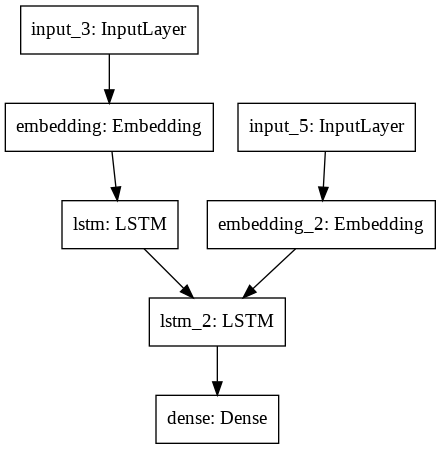

In [19]:
tf.keras.utils.plot_model(model)

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## fit

In [23]:
# index_inputs, index_outputs, index_targets
model.fit(x=[index_inputs, index_outputs], y=index_targets, batch_size=128, epochs=50)

Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 4.7118 - acc: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 46ms/step - loss: 4.6925 - acc: 0.0020
Epoch 3/50
1/1 [==============================] - 0s 31ms/step - loss: 4.6733 - acc: 0.8220
Epoch 4/50
1/1 [==============================] - 0s 33ms/step - loss: 4.6538 - acc: 0.8200
Epoch 5/50
1/1 [==============================] - 0s 31ms/step - loss: 4.6335 - acc: 0.8180
Epoch 6/50
1/1 [==============================] - 0s 32ms/step - loss: 4.6116 - acc: 0.8180
Epoch 7/50
1/1 [==============================] - 0s 44ms/step - loss: 4.5875 - acc: 0.8180
Epoch 8/50
1/1 [==============================] - 0s 37ms/step - loss: 4.5602 - acc: 0.8180
Epoch 9/50
1/1 [==============================] - 0s 35ms/step - loss: 4.5288 - acc: 0.8180
Epoch 10/50
1/1 [==============================] - 0s 34ms/step - loss: 4.4920 - acc: 0.8180
Epoch 11/50
1/1 [==============================] - 0s 42ms/step - loss: 4.448

refer : https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/blob/master/6.CHATBOT/6.4.seq2seq.ipynb
